# Data Loading

In [2]:
from gliomi import *
from gliomi.models import *
import tensorflow as tf
from keras.utils import to_categorical


In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import *
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout, Input

# from tensorflow.keras.initializers import glorot_uniform
# from tensorflow.keras.layers import Input, Add, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
# from tensorflow.keras.layers import Concatenate, Dense

class KerasApplicationClassifier(Model):

    def __init__(self, model_name, num_features=2, include_dropout=False, input_shape=(224, 224, 3)):
        inputs, outputs = self.keras_application_classifier(model_name, num_features=num_features, include_dropout=include_dropout, input_shape=input_shape)
        super().__init__(inputs, outputs)
        
    def keras_application_classifier(self, model_name, num_features=2, include_dropout=False, input_shape=(224, 224, 3)):
        
        # Base model is a Keras Application
        base_model = eval(model_name)(weights=None, include_top=False, input_tensor=Input(input_shape))

        # Pooling layer
        pool_layer = MaxPooling2D()(base_model.output)

        # Flatten before dense layers
        flatten_layer = Flatten()(pool_layer)

        # Feature leayer
        if include_dropout:
            # Drop-out
            feature_layer = Dense(512, activation='relu', kernel_initializer='glorot_uniform')(flatten_layer)
            feature_layer = Dropout(0.5)(feature_layer)
        else:
            feature_layer = Dense(512, activation='relu', kernel_initializer='glorot_uniform')(flatten_layer)

        # and a logistic layer -- let's say we have 200 classes
        prediction_layer = Dense(2, activation='softmax', kernel_initializer='glorot_uniform')(feature_layer)
        
        return base_model.input, prediction_layer

Subject in intersection: 152


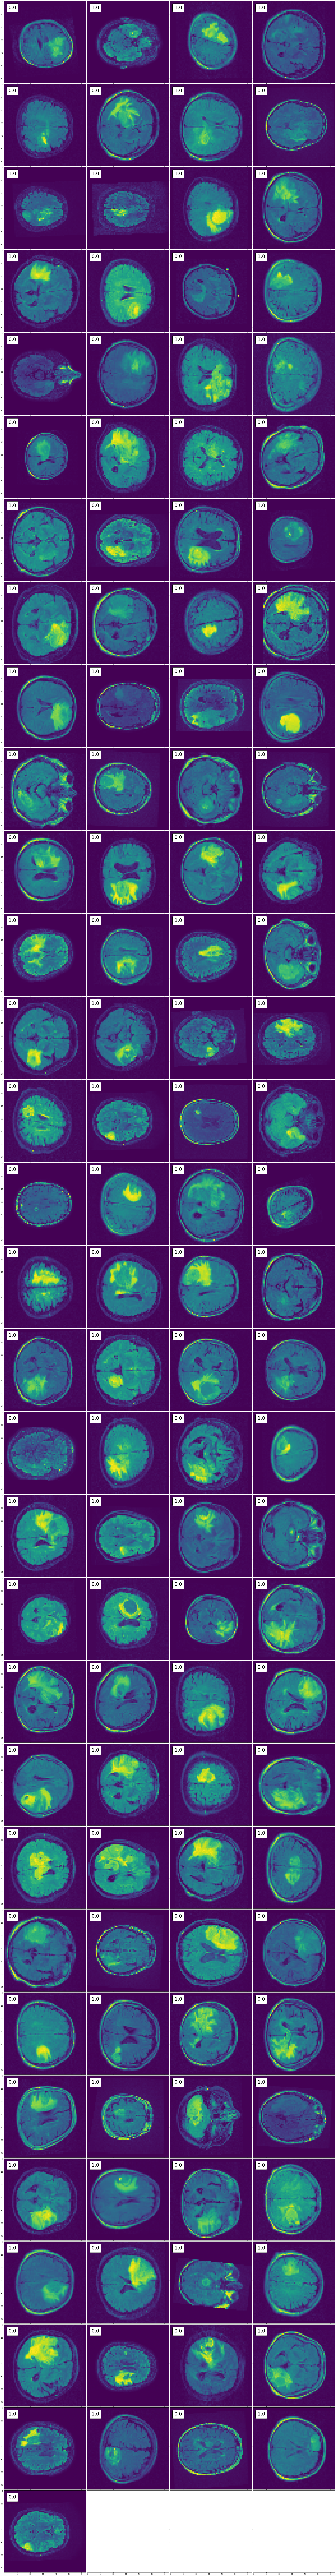

In [12]:

# Dataset Loader
loader = GliomiLoader(f"/data/RMN/dataset-gliomi-cnn/datasets-full-brain/FLAIR-64-100.pickle",
                      f"/data/RMN/dataset-gliomi-cnn/dataset-survivor.csv",
                      subjects_to_exclude=[])

# Get data
X_train, y_train, X_test, y_test = loader.get_data()

# Plot dataset and labels
plot_dataset_with_label(X_train, y_train)

In [ ]:
# Used on unbalanced datasets
balancer = DatasetBalancer()

# Model definition
model = KerasApplicationClassifier("MobileNetV2", input_shape=(64, 64, 1))

# Trainer
trainer = BinaryTrainer(model)

balanced_X, balanced_y = balancer.balance(X_train, y_train)

# Callback to print first 5 results after each epoch
print_prediction = tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: print(model.predict([balanced_X[:5,:,:,:]])))

# Make categorical
balanced_y = to_categorical(balanced_y)
y_test = to_categorical(y_test)

# Compile model
model.compile(optimizer="adam", 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

rp = ResultPlotter(model, accuracy_name="accuracy")

# Augmentation
aug = ImageDataGenerator(
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    fill_mode="nearest"
)

imageGenerator = aug.flow(x=balanced_X, y=balanced_y, batch_size=16)

trainer = BinaryTrainer(model)

history = trainer.train_and_test_generator(imageGenerator, X_test, y_test, epochs=5000, callbacks=[print_prediction])

rp.plot()

# Model definition

In [ ]:
model = KerasApplicationClassifier("MobileNetV2")

In [ ]:
loader = GliomiLoader(f"/data/RMN/dataset-gliomi-cnn/datasets-full-brain/FLAIR-224-100.pickle",
                      f"/data/RMN/dataset-gliomi-cnn/dataset-survivor.csv",
                      subjects_to_exclude=[])

In [ ]:
X_train, y_train, X_test, y_test = loader.get_data()

In [ ]:
balancer = DatasetBalancer()

In [ ]:
X_train, y_train = balancer.balance(X_train, y_train, 100)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
y_train

In [ ]:
# plot_dataset_with_label(X_train, y_train)

In [ ]:
trainer = BinaryTrainer(model)

In [ ]:
import tensorflow as tf

from keras.utils import to_categorical

print_prediction = tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: print(model.predict([X_train[:5,:,:,:]])))

balanced_X, balanced_y = balancer.balance(X_train, y_train)

balanced_y = to_categorical(balanced_y)

y_test = to_categorical(y_test)

model.compile(optimizer="adam", 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
balanced_X.shape, balanced_y.shape, X_test.shape, y_test.shape

In [ ]:
history = trainer.train_and_test(balanced_X, balanced_y, X_test, y_test, callbacks=[print_prediction])

plot_history(history)

In [ ]:
# import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [ ]:
!pip install --user pydot

In [ ]:
theObject = k.get_layer("block_2_expand")

print(theObject)

for p, value in vars(theObject).items():
    if p[0] == '_':
        continue
    print(p, ": ", value)

In [ ]:
plot_model(k, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
k = eval("MobileNetV2")(weights=None, include_top=True, input_shape=(224, 224, 1))

In [ ]:
k.summary()

In [ ]:
print(k.predict([X_train]))

In [ ]:
m1 = GliomiNature2019(128, classes=2)

In [ ]:
print(m1.predict([X_train]))

In [ ]:
slice_dataset = "/data/RMN/dataset-gliomi-cnn/datasets-full-brain"
# , "/data/RMN/dataset-gliomi-cnn/datasets-tumor-crop"]:
dataset = "survivor"
sequence = "T1"
percentile = 100
optimizer_name="adam"
epochs=5
batch_size=16

                
X_train, y_train, X_test, y_test = loader.get_data()

model = get_model(model_name, optimizer=optimizers[f'{optimizer_name}'](), include_dropout=False)

print(model.predict([X_train]))

# Compile model
# model.compile(optimizer=optimizer, loss="mse", metrics=['accuracy'])
#model.compile(optimizer=optimizer,
#              loss=BinaryCrossentropy(from_logits=True),
#              metrics=[BinaryAccuracy()])

model.compile(optimizer=optimizers[f'{optimizer_name}'](), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

print("Starting fit")

X_train, y_train, X_test, y_test = train_and_test(model, 
                                                  X_train, y_train, X_test, y_test, 
                                                  random_state=42, 
                                                  epochs=epochs, 
                                                  batch_size=batch_size, 
                                                  balance=True)


In [ ]:
from tensorflow.python.keras.losses import BinaryCrossentropy
from tensorflow.python.keras.metrics import BinaryAccuracy
from tensorflow.keras.applications import *

from tensorflow.keras.models import Model
# load_model
from tensorflow.keras.layers import GlobalMaxPooling2D, Flatten, Dense, Dropout

# Input, Add, , , Activation, ZeroPadding2D, BatchNormalization, , Conv2D, AveragePooling2D, MaxPooling2D, 

def get_model(model_name, optimizer, include_dropout=False):
    
    K.clear_session()

    K.set_image_data_format('channels_last')

    
    # loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True, name='categorical_crossentropy')
    
    # sigmoid with binary_crossentropy and single dense neuron
    
    return model

In [ ]:
import tensorflow as tf

optimizers = {
    'rmsprop': (lambda : tf.keras.optimizers.RMSprop(learning_rate=0.0001)),
    'sgd': (lambda : tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, decay=0.001/10, nesterov=False)),
    'adam' : (lambda : tf.keras.optimizers.Adam(lr=0.0001))
}

In [ ]:
import os

def make_name(slice_dataset, dataset, optimizer_name, sequence, percentile):
    slice_dataset = os.path.basename(slice_dataset).replace("datasets-", "")
    return "-".join([slice_dataset, dataset, optimizer_name, sequence, percentile])

In [ ]:
from keras.utils import to_categorical

def train_and_test(model, X_train, y_train, X_test, y_test, random_state=42, epochs=500, batch_size=16, balance=False):
    
    early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)
    #tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=f"logs-2.6-test/{model_name}")
    
    print_prediction = tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: print(model.predict([X_train[:5,:,:,:]])))
    
    if balance:
        balanced_X, balanced_y = balance_dataset(X_train, y_train)
    else:
        balanced_X, balanced_y = X_train, y_train
        
    balanced_y = to_categorical(balanced_y)
    y_test = to_categorical(y_test)
            
    model.fit(
        balanced_X, balanced_y, 
        epochs=epochs,
        callbacks=[print_prediction, early_stopping_callback],
        validation_data=(X_test, y_test), 
        shuffle=True,
        batch_size=batch_size)
    
    return balanced_X, balanced_y, X_test, y_test

In [ ]:
import matplotlib.pyplot as plt

"""
Save results in plot
"""
def save_plot(history, output_name):

    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    # plt.ylim([0,1.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')

    plt.savefig(f"{output_name}.png")
    # plt.show()

# Launch all balanced

In [ ]:
slice_dataset = "/data/RMN/dataset-gliomi-cnn/datasets-full-brain"
# , "/data/RMN/dataset-gliomi-cnn/datasets-tumor-crop"]:
dataset = "survivor"
sequence = "T1"
percentile = 100
optimizer_name="adam"
epochs=5
batch_size=16

loader = GliomiLoader(f"{slice_dataset}/{sequence}-{side}-{percentile}.pickle",
                                            f"{slice_dataset}/../dataset-{dataset}.csv",
                                            subjects_to_exclude=["RE_ATTILIO"])
                
X_train, y_train, X_test, y_test = loader.get_data()

model = get_model(model_name, optimizer=optimizers[f'{optimizer_name}'](), include_dropout=False)

print(model.predict([X_train]))

# Compile model
# model.compile(optimizer=optimizer, loss="mse", metrics=['accuracy'])
#model.compile(optimizer=optimizer,
#              loss=BinaryCrossentropy(from_logits=True),
#              metrics=[BinaryAccuracy()])

model.compile(optimizer=optimizers[f'{optimizer_name}'](), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

print("Starting fit")

X_train, y_train, X_test, y_test = train_and_test(model, 
                                                  X_train, y_train, X_test, y_test, 
                                                  random_state=42, 
                                                  epochs=epochs, 
                                                  batch_size=batch_size, 
                                                  balance=True)

# plot_file_name = make_name(slice_dataset, dataset, optimizer_name, sequence, str(percentile))



In [ ]:
model_name

In [ ]:
import tensorflow.keras.backend as K
import pandas as pd
from keras.utils import to_categorical

K.set_image_data_format('channels_last')
K.set_learning_phase(1)

columns = ["slice-dataset", "dataset", "optimizer","sequence", "percentile", "Train_acc", "Train_loss", "Val_acc", "Val_loss"]

keras_models = [
    "MobileNetV2",
    "NASNetMobile",
    "VGG19",
    "ResNet50",
    "ResNet101",
    "DenseNet169",
]

rows_list = []

side = 224
epochs=500
batch_size=16
    
result_file = "results-2.2_balanced.csv"

recover_count = 0

recover = False

if recover:
    df = pd.read_csv(result_file)
    rows_list = df.iloc[:, 1:]
    rows_list = np.array(rows_list).tolist()

for slice_dataset in ["/data/RMN/dataset-gliomi-cnn/datasets-full-brain", "/data/RMN/dataset-gliomi-cnn/datasets-tumor-crop"]:
    for dataset in ["survivor", "idh", "ki67", "egfr", "mgmt"]:
        for sequence in ["T1", "T2", "FLAIR", "ADC", "rCBV", "MPRAGE"]:
            for percentile in [100]:
                
                if recover and recover_count < len(rows_list):
                    pass
                    
                for model_name in keras_models:
                    for optimizer_name in ['rmsprop','sgd','adam']:
                        if recover and recover_count < len(rows_list):
                            recover_count = recover_count + 1
                            print("Skip row:", recover_count)
                            continue

                        recover = False

                        # try:

                        K.clear_session()

                        X_train, y_train, X_test, y_test = get_data(f"{slice_dataset}/{sequence}-{side}-{percentile}.pickle",
                                                                    f"{slice_dataset}/../dataset-{dataset}.csv")

                        model = get_model(model_name, optimizer=optimizers[f'{optimizer_name}'](), include_dropout=True)

                        print("Starting fit")

                        X_train, y_train, X_test, y_test = train_and_test(model, 
                                                                          X_train, y_train, X_test, y_test, 
                                                                          random_state=42, 
                                                                          epochs=epochs, 
                                                                          batch_size=batch_size, 
                                                                          balance=True)

                        plot_file_name = make_name(slice_dataset, dataset, optimizer_name, sequence, str(percentile))

                        save_plot(model.history, f"2.2-{plot_file_name}_balanced")
                        
                        print(model.predict([X_train]))

                        train_score = model.evaluate(X_train, y_train)

                        test_score = model.evaluate(X_test, y_test)

                        rows_list.append([
                            slice_dataset,
                            dataset,
                            optimizer_name,
                            sequence,
                            percentile,
                            str(train_score[1]),
                            str(train_score[0]),
                            str(test_score[1]),
                            str(test_score[0])
                        ])

                        df = pd.DataFrame(rows_list, columns=columns)

                        df.to_csv(result_file)